In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_pickle('../data/saved_processed_data/saved_h5/seq_struct_n_classes_2.pkl')


Text(0, 0.5, '# of Sequences')

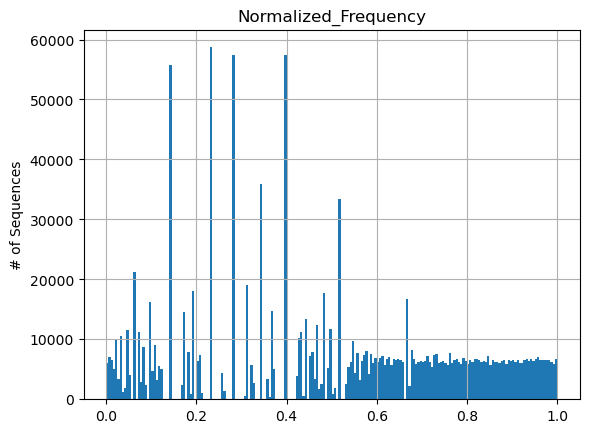

In [14]:
df.hist(column='Normalized_Frequency', bins=200)
plt.ylabel('# of Sequences')


Text(0, 0.5, '# of Sequences')

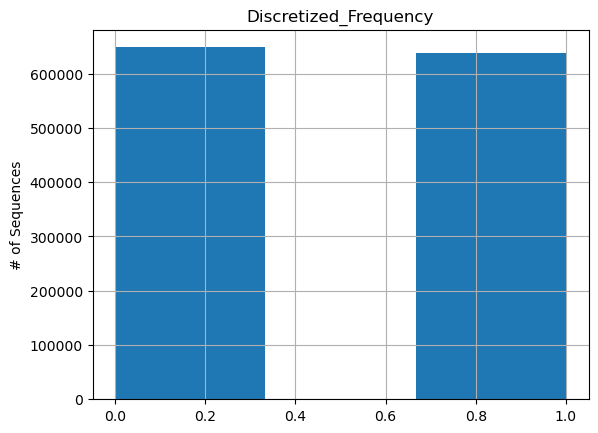

In [15]:
df.hist(column='Discretized_Frequency', bins=3)
plt.ylabel('# of Sequences')


Text(0, 0.5, '# of Sequences')

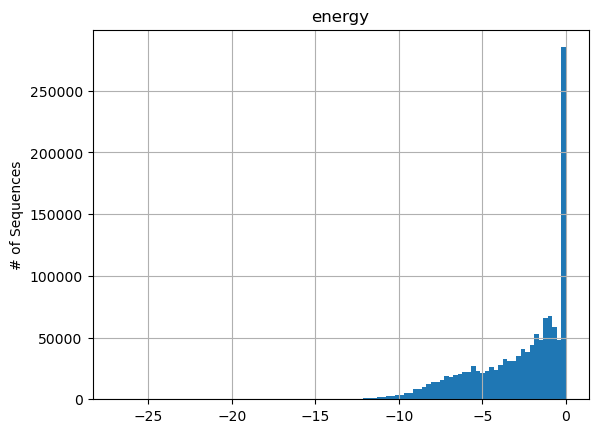

In [16]:
df.hist(column='energy', bins=100)
plt.ylabel('# of Sequences')


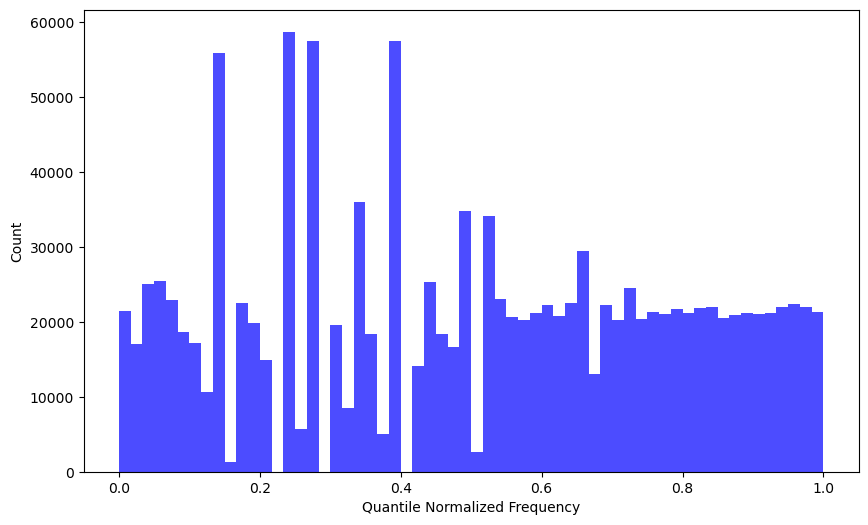

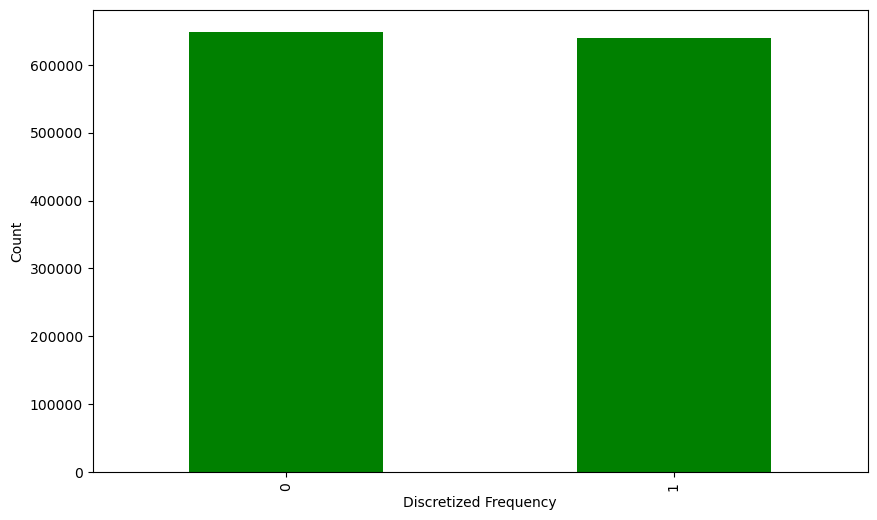

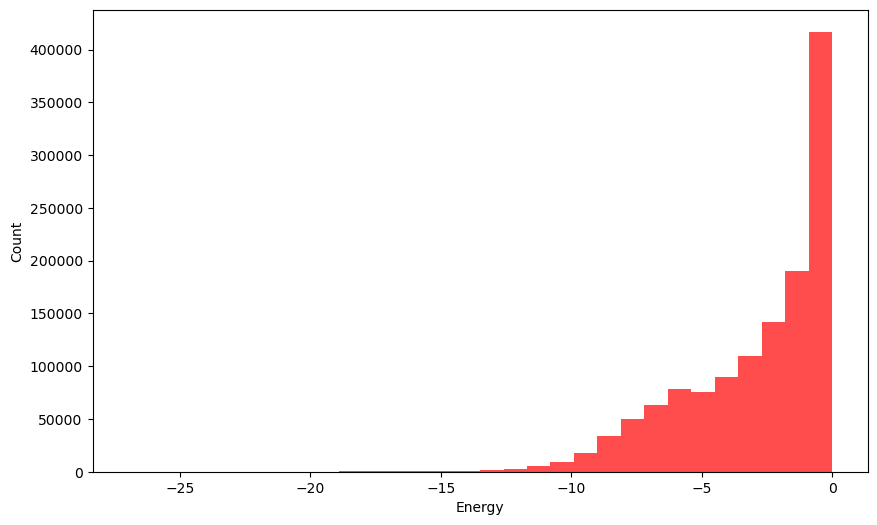

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Plotting Normalized Frequency
plt.figure(figsize=(10, 6))
plt.hist(df['Normalized_Frequency'], bins=60, alpha=0.7, color='blue')
# plt.title('Distribution of Normalized Frequencies')
plt.xlabel('Quantile Normalized Frequency')
plt.ylabel('Count')
plt.show()

# Discretized Frequency Counts
discretized_counts = df['Discretized_Frequency'].value_counts()
plt.figure(figsize=(10, 6))
discretized_counts.plot(kind='bar', color='green')
# plt.title('Counts of Discretized Frequencies')
plt.xlabel('Discretized Frequency')
plt.ylabel('Count')
plt.show()

# Energy Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['energy'], bins=30, alpha=0.7, color='red')
# plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()


In [3]:
from aptamer_transformer.data_utils import *

2024-01-19 17:16:33.898897: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-19 17:16:37.221127: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 17:16:37.221199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 17:16:37.383326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 17:16:37.651337: I tensorflow/core/platform/cpu_feature_guar

In [4]:
cfg = read_cfg('/glade/u/home/mlsample/work/aptamer_transformer/aptamer_transformer/config.yaml')

dfs = read_data_files(cfg)

In [13]:
df_lens = [len(df) for df in dfs.values()]

print('Total Sequences: ', sum(df_lens))

Total Sequences:  93890676


In [5]:
normed_counter = normalized_counters(dfs)

In [6]:
enrichment_data = all_enrichments(normed_counter)

In [7]:
# Convert to DataFrame
df_list = []
for (round1, round2), sequences in enrichment_data.items():
    for sequence, enrichment_score in sequences.items():
        df_list.append({
            "Round1": round1,
            "Round2": round2,
            "Sequence": sequence,
            "EnrichmentScore": enrichment_score
        })

df = pd.DataFrame(df_list)

df["EnrichmentScore"] = df["EnrichmentScore"].apply(lambda x:np.log(x) )

count    4.721953e+06
mean    -2.231314e-01
std      1.384799e+00
min     -9.752478e+00
25%     -1.156702e+00
50%     -2.779888e-01
75%      6.444756e-01
max      1.449673e+01
Name: EnrichmentScore, dtype: float64


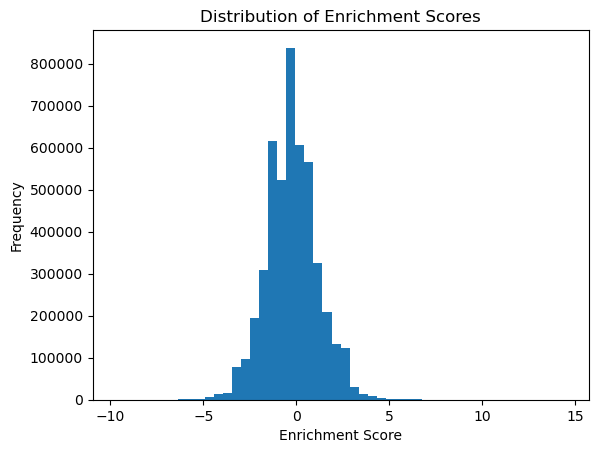

In [8]:
print(df['EnrichmentScore'].describe())
df['EnrichmentScore'].plot(kind='hist', bins=50, title='Distribution of Enrichment Scores')
plt.xlabel('Enrichment Score')
plt.ylabel('Frequency')
plt.show()


In [51]:
unique_sequences = df.groupby('Sequence')['EnrichmentScore'].agg(['mean', 'sum', 'max', 'min', 'count']).reset_index()
unique_sequences = unique_sequences[unique_sequences['count'] > 1]
unique_sequences = unique_sequences[~unique_sequences['Sequence'].str.contains('N')]

# unique_sequences = unique_sequences.sort_values(by='mean', ascending=False)


array([[<Axes: title={'center': 'mean'}>]], dtype=object)

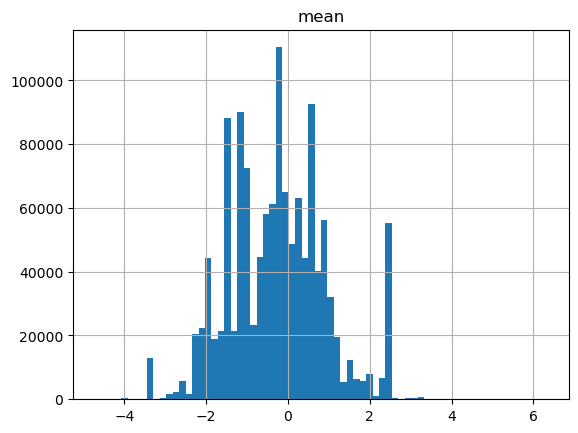

In [49]:
unique_sequences.hist(column='mean', bins=70)

In [52]:
unique_sequences

,Sequence,mean,sum,max,min,count
0,AAAAAAAAAAACGGGGGGGGGGGGTGGGGGGGGGGGTCCT,-0.339708,-0.339708,-0.339708,-0.339708,1
1,AAAAAAAAAAACGGGGGGGGGGGGTGGGGTGGGGGGTCCT,-1.176262,-1.176262,-1.176262,-1.176262,1
2,AAAAAAAATGGGGGGGGCGGGGGGGGGGGTCTGTTTATTT,-0.336079,-0.336079,-0.336079,-0.336079,1
3,AAAAAAAATGGGGGGGGGGGGGGGGGGGGTCTGTTTATTT,-2.214411,-6.643234,-1.193779,-3.321617,3
4,AAAAAAACGGCATCGCTAGGCATCAGGTCCCATCCGGTTA,0.152535,0.457605,2.486318,-2.257516,3
...,...,...,...,...,...,...
1287746,TTTTTTTTTTTTTTGGGGGGTTGGGGGGGGCGGGGGTCCC,0.844015,0.844015,0.844015,0.844015,1
1287747,TTTTTTTTTTTTTTTGGGGGGGGGCGGGGGGGGGGGTCCC,2.315378,2.315378,2.315378,2.315378,1
1287748,TTTTTTTTTTTTTTTGGGGGGGGGGGGGGGGGGGGGTCCC,-0.312687,-0.312687,-0.312687,-0.312687,1
1287749,TTTTTTTTTTTTTTTGGGGGGTGGGGGGGGGGGGGGTCCC,0.844015,0.844015,0.844015,0.844015,1


In [53]:
import nupack as npk

model1 = npk.Model(material='dna', ensemble='stacking', celsius=30, sodium=0.05, magnesium=0.0125)


strand_dict = {seq: npk.Strand(seq, name=str(i)) for i, seq in enumerate(unique_sequences['Sequence'])}


In [55]:
mfes = {key: npk.mfe([strand_dict[key]], model=model1)  for key in strand_dict}


In [71]:
with open('../data/nupack_strucutre_data/all_mfe.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(mfes, f, pickle.HIGHEST_PROTOCOL)

In [58]:
unique_sequences['struct'] = unique_sequences['Sequence'].map(mfes)

In [84]:
unique_sequences.struct.iloc[0][0].structure.structure_matrix()
unique_sequences.struct.iloc[1][0].structure.dotparensplus()

'..............................((.....)).'

In [67]:
unique_sequences['energy'] = unique_sequences['struct'].apply(lambda x: x[0].energy)

In [85]:
unique_sequences['dot_bracket'] = unique_sequences['struct'].apply(lambda x: x[0].structure.dotparensplus())

In [86]:
unique_sequences['strucutre_matrix'] = unique_sequences['struct'].apply(lambda x: x[0].structure.structure_matrix())

In [93]:
unique_sequences.strucutre_matrix[132101]

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [94]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


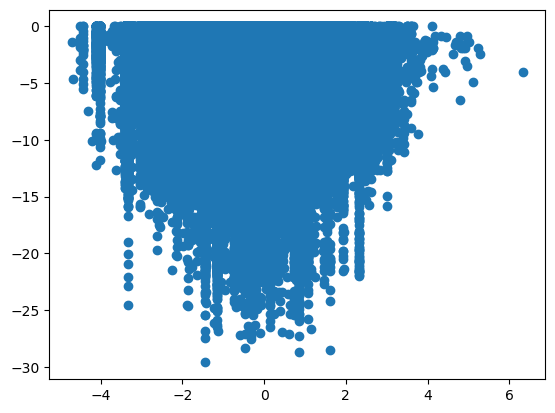

In [70]:

plt.plot(unique_sequences['mean'], unique_sequences['energy'], 'o')

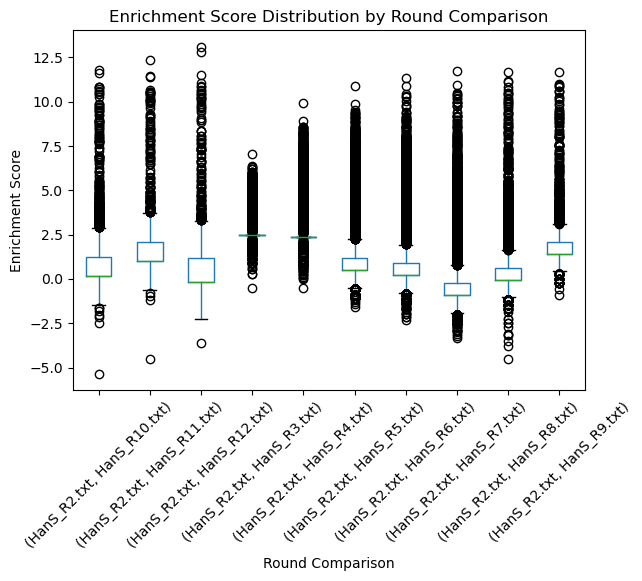

In [85]:
df.boxplot(by=['Round1', 'Round2'], column=['EnrichmentScore'], grid=False, rot=45)
plt.title('Enrichment Score Distribution by Round Comparison')
plt.suptitle('')
plt.xlabel('Round Comparison')
plt.ylabel('Enrichment Score')
plt.show()

In [96]:
top_enriched = df.sort_values(by='EnrichmentScore', ascending=False).head(10)
print(top_enriched[['Round1', 'Round2', 'Sequence', 'EnrichmentScore']])


             Round1        Round2                                   Sequence  \
620     HanS_R1.txt   HanS_R7.txt   GGGCGGGAGGGAGGGGGGCCACACCAAAACACGTTCAACT   
850     HanS_R1.txt   HanS_R9.txt   GGGCGGGAGGGAGGGGGGCCACACCAAAACACGTTCAACT   
752     HanS_R1.txt   HanS_R8.txt   GGGCGGGAGGGAGGGGGGCCACACCAAAACACGTTCAACT   
943     HanS_R1.txt  HanS_R10.txt   GGGCGGGAGGGAGGGGGGCCACACCAAAACACGTTCAACT   
1028    HanS_R1.txt  HanS_R11.txt   GGGCGGGAGGGAGGGGGGCCACACCAAAACACGTTCAACT   
487     HanS_R1.txt   HanS_R6.txt   GGGCGGGAGGGAGGGGGGCCACACCAAAACACGTTCAACT   
1108    HanS_R1.txt  HanS_R12.txt   GGGCGGGAGGGAGGGGGGCCACACCAAAACACGTTCAACT   
361360  HanS_R2.txt  HanS_R12.txt  CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG   
362423  HanS_R2.txt  HanS_R12.txt   AAGGAGGGTAGGTAGTGCTTGGTAGGGAAACTCCGCCGAT   
1058    HanS_R1.txt  HanS_R12.txt  CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG   

        EnrichmentScore  
620           14.496730  
850           14.446662  
752           14.438035  
943           1

In [90]:
qunat_enrich = quantile_normed_enrichment(enrichment_data, cfg)

In [39]:
qunat_enrich

{('HanS_R1.txt',
  'HanS_R2.txt'): {'ATCGGGGGGTGGGTTTGGGTATGGGGTCTGCACTATGGCTC': 0.6504854368932038, 'TCGCGGGGGGCGGGTCGGGTGCTCGTTCGAGGGGTCGCAG': 0.6601941747572817, 'AGGTTGGTGTAGGTTTAGGTTGTATTGGTTAGGGTTGAGA': 0.37864077669902907, 'TGGCTGTCTTACGATCGCGAAGGACGATTGAAAACTTTGA': 0.37864077669902907, 'GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG': 0.009708737864077669, 'ATAGTTACGGGTGAGCCGTCATTCAAGTTTACTACTTCTG': 0.37864077669902907, 'CCCATGGTAGGTATTGCTTGGTAGGGATAGTGGGCTTGATG': 0.029126213592233018, 'GGGAGGGAGGGTGGGGGGTTCTCGCTGCGGGTTTTGGTGC': 0.6407766990291262, 'TGGGTGGGAGGGAGGGGGGCTTTATTCCGGTGTTTTTTCG': 0.09708737864077668, 'AGGCTTATCGTCAGGGGGGTGGGTCCGGGTTCGGGGTCGT': 0.038834951456310676, 'ATCGGGGGGTGGGTTTGGGTATGGGGTCCGCACTATGGCTC': 0.11650485436893203, 'CACGTTGTACACTGGGGGGTGGGAAGGGCTGGGTCCAGAT': 0.0, 'TGGGGGGGGAGGGTAGGGTATGGGGTCGTACAGTGGGTTTC': 0.06796116504854369, 'AGGAGGGCAATATGTTAGGTAGTGGGGTTGATCGTCTTTCG': 0.37864077669902907, 'GTCTTGGGGGGTGGGATGGGATTGGGGTCGCGGTTCGAGT': 0.37864077669902907, 

In [92]:
# Convert to DataFrame
df_list = []
for (round1, round2), sequences in qunat_enrich.items():
    for sequence, enrichment_score in sequences.items():
        df_list.append({
            "Round1": round1,
            "Round2": round2,
            "Sequence": sequence,
            "EnrichmentScore": enrichment_score
        })

df = pd.DataFrame(df_list)

In [40]:
combined = sum((Counter(d) for d in qunat_enrich.values()), Counter())
df = pd.DataFrame.from_dict(combined, orient='index', columns=['Normalized_Frequency']).reset_index().rename(columns={'index': 'Sequence'})
    

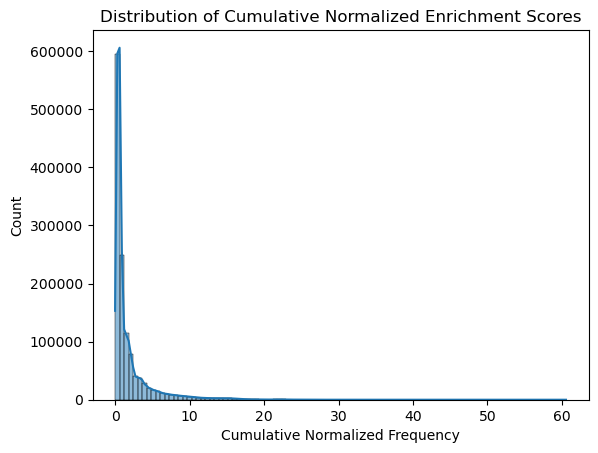

In [42]:
df_sorted = df.sort_values(by='Normalized_Frequency', ascending=False)


threshold = df_sorted['Normalized_Frequency'].quantile(0.95)  # Example for top 5%
df_top = df_sorted[df_sorted['Normalized_Frequency'] >= threshold]

import seaborn as sns

sns.histplot(df_sorted['Normalized_Frequency'], bins=100, kde=True)
plt.xlabel('Cumulative Normalized Frequency')
plt.ylabel('Count')
plt.title('Distribution of Cumulative Normalized Enrichment Scores')
plt.show()


In [44]:
final_normalization = enrichment_normalization_two(df, cfg)

In [45]:
final_normalization

,Sequence,Normalized_Frequency
0,ATCGGGGGGTGGGTTTGGGTATGGGGTCTGCACTATGGCTC,1.000000
1,TCGCGGGGGGCGGGTCGGGTGCTCGTTCGAGGGGTCGCAG,1.000000
2,AGGTTGGTGTAGGTTTAGGTTGTATTGGTTAGGGTTGAGA,0.999376
3,TGGCTGTCTTACGATCGCGAAGGACGATTGAAAACTTTGA,0.184251
4,GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG,0.996744
...,...,...
1287745,AAGGCTTATCGGCTGGGGGGTGGGCCCGGGTTTGGGGTCGT,0.108108
1287746,GGGCGCGGGCCGCCCCGGCCACACCAAAACACGTTCAGCT,0.108108
1287747,GGGGGTTGCCGCCCCGGGCCACACCAAAACACGTTCAACT,0.108108
1287748,TGGGGGGGGGGGTTTGGTTATGGGGTCCGCACTGTGGCTC,0.549977
